In [1]:
import numpy as np
import matplotlib.pyplot as plt

import jlinops
import sampi

# Make a toy problem

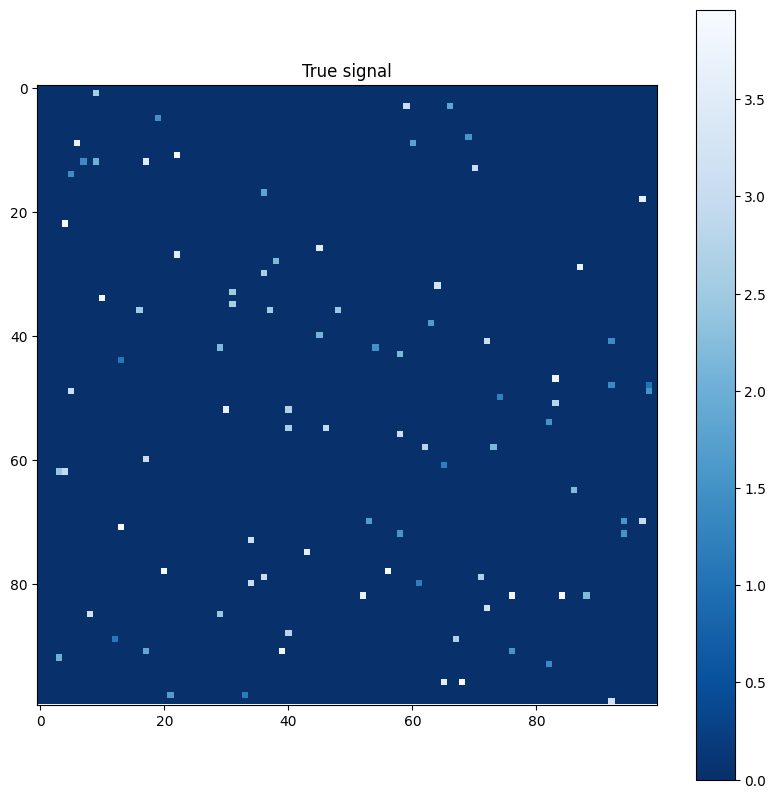

In [2]:
# Set example size
M, N = 100, 100
img_shape = (M,N)

# Draw random image
np.random.seed(1)
p = np.random.binomial(1, 0.01, size=img_shape).astype(np.float64)
q = np.random.uniform(low=1, high=4, size=img_shape).astype(np.float64)
image = p*q

plt.figure(figsize=(10,10))
plt.imshow(image, cmap="Blues_r")
plt.title("True signal")
plt.colorbar()
plt.show()

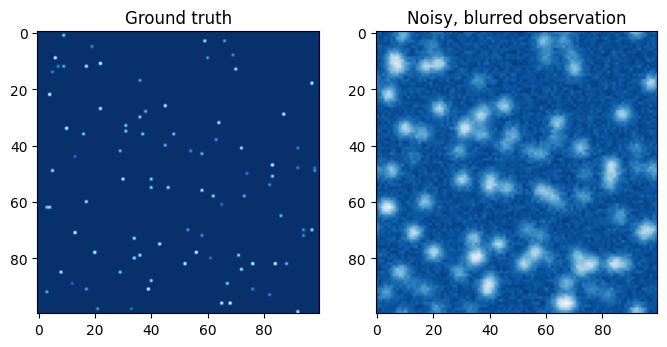

In [3]:
# Make blurring operator
blur_sigma = np.array(2.0).astype(np.float64) # standard deviation of the blur
blur_op = jlinops.Gaussian2DBlurOperator(image.shape, blur_sigma, mode="wrap")

# Blurred image
blurred_image = blur_op.matvec_shaped(image)

# Add some noise
noise_sigma = 0.01
noise_var = noise_sigma**2
noisy_image = blurred_image + noise_sigma*np.random.normal(size=image.shape)

# Plot
fig, axs = plt.subplots(1, 2, figsize=(8,5))
axs[0].imshow(image, cmap="Blues_r")
axs[0].set_title("Ground truth")
axs[1].imshow(noisy_image, cmap="Blues_r")
axs[1].set_title("Noisy, blurred observation")
fig.show()

# Solve with FISTA

In [36]:
# Data likelihood term
f = sampi.GaussianDataLikelihood(blur_op, noisy_image.flatten(), v=noise_var)

In [71]:
# Prior term
g = sampi.L1NormPenalty(blur_op.shape[1], reg_lam=1e-3)

In [72]:
# Build objective
obj = sampi.CompositeModelObjectiveFunction(f, g)

In [75]:
# Solve with MFISTA
mfista_solver = sampi.MFISTASolver(obj)
mfista_solver_data = mfista_solver.solve(iterations=int(1e4), L=5.0)

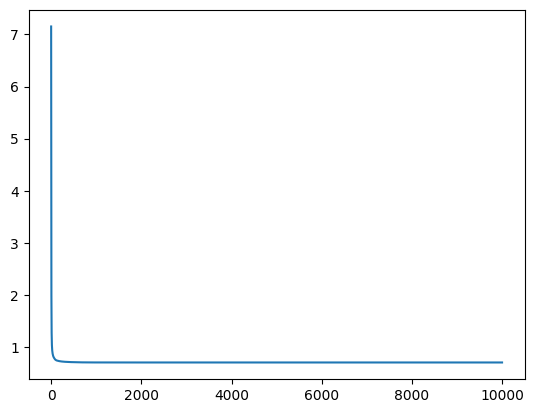

In [76]:
plt.plot(mfista_solver_data["obj_vals"])
plt.show()

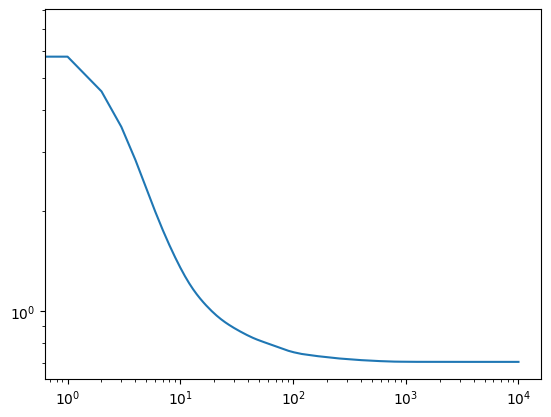

In [77]:
plt.loglog(mfista_solver_data["obj_vals"])
plt.show()

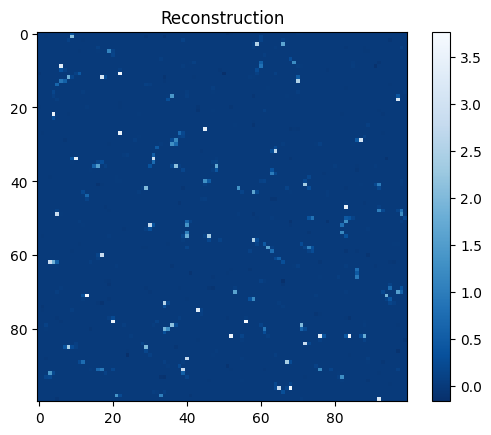

In [79]:
plt.imshow(mfista_solver_data["result"].reshape(noisy_image.shape), cmap="Blues_r")
plt.title("Reconstruction")
plt.colorbar()
plt.show()

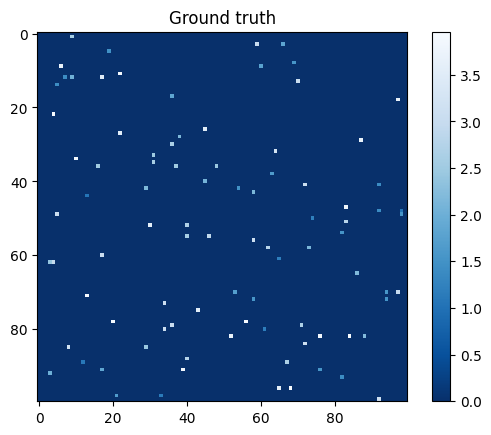

In [80]:
plt.imshow(image, cmap="Blues_r")
plt.title("Ground truth")
plt.colorbar()
plt.show()

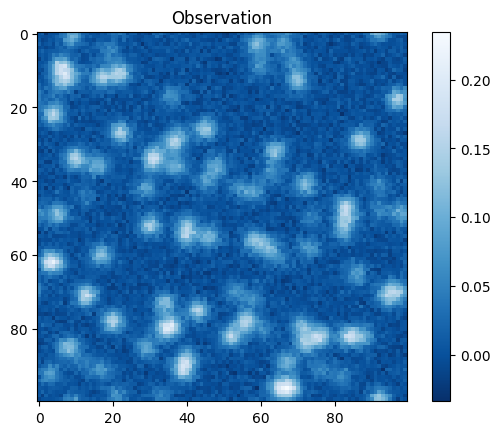

In [81]:
plt.imshow(noisy_image, cmap="Blues_r")
plt.title("Observation")
plt.colorbar()
plt.show()